# Eficiência das árvores AB, ABB e AVL - T5 (AED)
**Disciplina:** ESTCMP011 - Algoritmos e Estruturas de Dados I (2020/01)               
**Victor Hugo Santos de Lima** - 1915080025                      
**Giovanna Souza Teodoro** - 1915080065                                 


# Árvores


**Árvore binária (AB)**

In [ ]:
import time

class TreeNodeBT:
    def __init__(self,data): 
        self.data = data  
        self.left = None  
        self.right = None 
        self.level = None 
 
class BinaryTree:
    def __init__(self): 
        self.root = None

    # insercao por varredura de nivel
    def insert(self, key):
        if self.root is None:
            self.root = TreeNodeBT(key)
        else:
            self._insert(self.root, key)
    
    def _insert(self, node, key):
        q = [node]
        while(len(q)):
            current = q.pop(0)

            if not current.left:
                current.left = TreeNodeBT(key)
                break
            else:
                q.append(current.left)
            if not current.right:
                current.right = TreeNodeBT(key)
                break
            else:
                q.append(current.right)
        return node
 
    # a pesquisa também será por varredura
    # desta vez será pelo método de caminho pós-fixado
    # funcao recursiva: arvore esquerda, arvore direita, nó
    def search_postorder(self,node,value):
        if node is not None:
            # visita arvore esquerda
            self.search_postorder(node.left,value)
            # visita arvore a direita 
            self.search_postorder(node.right,value)
            #print(node.data)
            if (node.data == value):
                # o tempo cronometrado será da saída do output
                print("Elemento encontrado na árvore AB!")
                print("Tempo para realizar a busca na AB:", time.time() - start1)


**Árvore binária de busca (ABB)**

In [ ]:
import time

class TreeNodeBST:
    def __init__(self, data):
        self.data = data
        self.left = None        
        self.right = None


class BinarySearchTree:
    def __init__(self):
        self.root = None
    
    def search(self, key):
        if self.root is None:
            print("Árvore vazia!")
        else:
            self._search(self.root, key)
    
    def _search(self, node, key):
        if node is None:
            print("Elemento não está na árvore!")
        elif key == node.data:
            print("Elemento encontrado na árvore ABB!")
            print("Tempo para realizar a busca na ABB:", time.time() - start2)
        elif key < node.data:
            self._search(node.left, key)
        else:
            self._search(node.right, key)


    def insert(self, key):
        if self.root is None:
            self.root = TreeNodeBST(key)
        else:
            self._insert(self.root, key)
    
    def _insert(self, node, key):
        if node is None:
            return TreeNodeBST(key)
        elif key < node.data:
            node.left = self._insert(node.left, key)
        else:
            node.right = self._insert(node.right, key)
        return node


**Árvore AVL**

In [ ]:
import time

class TreeNode:
    def __init__(self, data):
        # Valor do nó
        self.data = data
        # Ponteiro para a esquerda do nó
        self.left = None
        # Ponteiro para a direita do nó
        self.right = None
        # Altura do nó
        self.height = 1


class AVLTree:
    def __init__(self):
        # Raiz da árvore
        self.root = None

    # Chama a função de pesquisa de profundidade, pode ser acessada externamente
    def search(self, key):
        # Inicia a recursão que irá procurar a chave digitada
        return self._search(self.root, key)

    # Pesquisa um elemento na árvore 
    def _search(self, node, key):
        # Verifica se o nó é nulo, o que indica que o elemento não está presente 
        if node is None:
            print("Elemento não está na Árvore!")
        # Verifica se a chave é igual ao valor do nó, é um caso de parada
        elif key == node.data:
            print("Elemento encontrado na árvore AVL!")
            print("Tempo para realizar a busca na AVL:", time.time() - start3)
        # Verifica se a chave é menor que o valor do nó
        elif key < node.data:
            self._search(node.left, key)
        else:
            self._search(node.right, key)
        return None

    # Chama a função de inserção, pode ser acessada externamente
    def insert(self, key):
        # Inicia a recursão para percorrer a árvore, adicionar o novo elemento e
        # possivelmente definir uma nova raiz para a árvore
        self.root = self._insert(self.root, key)

    # Insere um novo elemento à árvore
    def _insert(self, node, key):
        # Verifica se o nó está vazio, serve tanto para definir a primeira raiz,
        # quanto para adicionar um novo elemento em uma posição vazia
        if node is None:
            # Retorna o TreeNode da chave
            return TreeNode(key)
        # Verifica se a chave é menor que o valor do nó
        elif key < node.data:
            # Chama a função para o lado esquerdo do nó e o atualiza
            node.left = self._insert(node.left, key)
        else:
            # Chama a função para o lado direito do nó e o atualiza
            node.right = self._insert(node.right, key)
        # Chama a função que irá corrigir a árvore se houver necessidade
        return self._balance(node)

    # Regula um nó desbalanceado da árvore
    def _balance(self, node):
        # Define a altura do nó
        self._setHeight(node)
        # Chama a função que retorna o fator de balanço do nó e verifica se este
        # é maior que 1
        if self._getBalance(node) > 1:
            # Verifica se o fator de balanço do nó filho à esquerda é maior que 0
            # Caso esquerda-esquerda
            if self._getBalance(node.left) > 0:
                # Retorna uma nova raiz para a árvore após executar uma rotação
                # à direita
                return self._rightRotation(node)
            # Caso esquerda-direita
            else:
                # O neto do nó toma o lugar do filho à esquerda do nó, após uma
                # rotação à esquerda
                node.left = self._leftRotation(node.left)
                # Retorna uma nova raiz para a árvore após uma rotação à direita
                return self._rightRotation(node)
        # Chama a função que retorna o fator de balanço do nó e verifica se este
        # é menor que -1
        if self._getBalance(node) < -1:
            # Verifica se o fator de balanço do nó filho à direita é menor que 0
            # Caso direita-direita
            if self._getBalance(node.right) < 0:
                # Retorna uma nova raiz para a árvore após uma rotação à esquerda
                return self._leftRotation(node)
            # Caso direita-esquerda
            else:
                # O neto do nó toma o lugar do filho à direita do nó, após uma
                # rotação à direita
                node.right = self._rightRotation(node.right)
                # Retorna uma nova raiz para a árvore após uma rotação à esquerda
                return self._leftRotation(node)
        # Retorno padrão à função _insert()
        return node

    # Define uma nova altura para um nó
    def _setHeight(self, node):
        # Acha a maior distância do nó a um nó folha descendente
        node.height = 1 + max(self._getHeight(node.left), self._getHeight(node.right))

    # Função que retorna a altura do nó
    def _getHeight(self, node):
        # Verifica se o nó foi alocado
        if node is None:
            return 0
        else:
            # Retorna a altura do nó
            return node.height

    # Função que calcula o fator de balanço de um nó
    def _getBalance(self, node):
        # Retorna a diferença entre a altura do nó filho à esquerda e a altura do
        # nó filho à direita
        return self._getHeight(node.left) - self._getHeight(node.right)

    # Função que rotaciona um nó no sentido anti-horário
    def _leftRotation(self, uNode):
        # sNode recebe o nó filho à direita de uNode
        sNode = uNode.right
        # O filho à direita de uNode é substituido pelo filho à esquerda de sNode
        uNode.right = sNode.left
        # O filho à esquerda de sNode recebe uNode
        sNode.left = uNode

        # Redefine as alturas dos 2 nós
        self._setHeight(uNode)
        self._setHeight(sNode)

        # Retorna o sNode, que será a nova raiz da árvore
        return sNode

    # Função que rotaciona um nó no sentido horário
    def _rightRotation(self, uNode):
        # sNode recebe o nó filho à esquerda de uNode
        sNode = uNode.left
        # O filho à esquerda de uNode é substituido pelo filho à direita de sNode
        uNode.left = sNode.right
        # O filho à direita de sNode recebe uNode
        sNode.right = uNode

        # Redefine as alturas dos 2 nós
        self._setHeight(uNode)
        self._setHeight(sNode)

        # Retorna o sNode, que será a nova raiz da árvore
        return sNode



# Visualização

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
  if not nx.is_tree(G):
    raise TypeError('cannot_use_hierarchy_pos_on_a_graph_that_is_not_a_tree')
  if root is None:
    if isinstance(G, nx.DiGraph):
      root = next(iter(nx.topological_sort(G)))
    else:
      root = random.choice(list(G.nodes))

  def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None,parent=None):
    if pos is None:
      pos = {root:(xcenter, vert_loc)}
    else:
      pos[root] = (xcenter, vert_loc)
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
      children.remove(parent)
    if len(children)!=0:
      dx = width/len(children)
      nextx = xcenter - width/2 - dx/2
      for child in children:
        nextx += dx
        pos = _hierarchy_pos(G, child, width = dx, vert_gap = vert_gap, vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root)
    return pos
  return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

# Situação em que AB > ABB e AVL

Operação avaliada: busca()

Explicação: Visto que o método de busca da árvore binária é pela varredura pós-fixado, o elemento que estiver mais à esquerda será o primeiro a ser acessado. A árvore binária de busca vai demorar, uma vez que o elemento também é o de maior valor, ou seja, o nó com maior profundidade. Embora o método de pesquisa da árvore binária de busca seja igual ao da árvore AVL, espera-se que ela seja mais eficaz, uma vez que ela é uma binária completa, em vez de degenerada, como é o caso da árvore binária de busca.

In [ ]:
# -------------- CONJUNTO DE DADOS -------------- #
arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

# ---------- VALOR QUE SERÁ PROCURADO ----------- #
#                       16                        #

# --------------- ARVORE BINARIA ---------------- #                    
tree1 = BinaryTree()     
for i in arr:
    tree1.insert(i)
start1 = time.time()
tree1.search_postorder(tree1.root,16)

# ------------ ARVORE DE BUSCA BINARIA ---------- # 
tree2 = BinarySearchTree()     
for i in arr:
    tree2.insert(i)
start2 = time.time()
tree2.search(16)

# ------------------ ARVORE AVL ----------------- #
tree3 = AVLTree()
for i in arr:
    tree3.insert(i)
start3 = time.time()
tree3.search(16)

Elemento encontrado na árvore AB!
Tempo para realizar a busca na BT: 0.00011444091796875
Elemento encontrado na árvore BSS!
Tempo para realizar a busca na BSS: 0.0007946491241455078
Elemento encontrado na árvore AVL!
Tempo para realizar a busca na AVL: 0.0003006458282470703


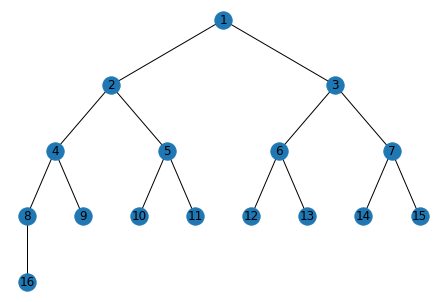

In [ ]:
#@title Resultado visual da AB

G=nx.Graph()
G.add_edges_from([(1,2),(1,3),(2,4),(2,5),(3,6),(3,7),(4,8),(4,9),(5,10),(5,11),(6,12),(6,13),(7,14),(7,15),(8,16)])
pos = hierarchy_pos(G,1)
nx.draw(G, pos=pos, with_labels=True)

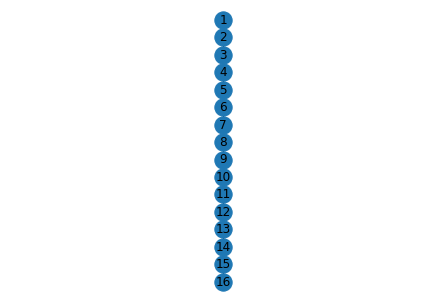

In [ ]:
#@title Resultado visual da ABB
G=nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,13),(13,14),(14,15),(15,16)])
pos = hierarchy_pos(G,1)
nx.draw(G, pos=pos, with_labels=True)

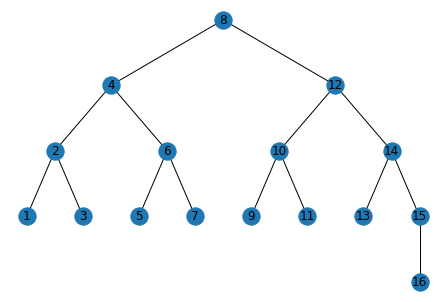

In [ ]:
#@title Resultado visual da AVL
#{oi}
G=nx.Graph()
G.add_edges_from([(8,4),(8,12),(4,2),(4,6),(12,10),(12,14),(2,"1"),(2,3),(14,13),(14,15),(10,9),(10,11),(6,5),(6,7),(15,16)])
pos = hierarchy_pos(G,8)
nx.draw(G, pos=pos, with_labels=True)


# Situação em que ABB > AB e AVL

Operação avaliada: busca()

Explicação: A árvore binária de busca conseguirá ser mais rápida porque, embora degenerada, o valor que se procura vai ser comparado com a raíz e rapidamente visto se está à direita ou à esquerda. A árvore binária ainda estará fazendo a varredura pós-fixada, enquanto a AVL terá que percorrer um caminho mais longo devido tantos pivotamentos de nós. 

In [ ]:
# -------------- CONJUNTO DE DADOS -------------- #
arr = [15,16,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

# ---------- VALOR QUE SERÁ PROCURADO ----------- #
#                       16                        #

# --------------- ARVORE BINARIA ---------------- #                    
tree1 = BinaryTree()     
for i in arr:
    tree1.insert(i)
start1 = time.time()
tree1.search_postorder(tree1.root,16)

# ------------ ARVORE DE BUSCA BINARIA ---------- # 
tree2 = BinarySearchTree()     
for i in arr:
    tree2.insert(i)
start2 = time.time()
tree2.search(16)

# ------------------ ARVORE AVL ----------------- #
tree3 = AVLTree()
for i in arr:
    tree3.insert(i)
start3 = time.time()
tree3.search(16)

Elemento encontrado na árvore AB!
Tempo para realizar a busca na BT: 0.0001304149627685547
Elemento encontrado na árvore BSS!
Tempo para realizar a busca na BSS: 4.029273986816406e-05
Elemento encontrado na árvore AVL!
Tempo para realizar a busca na AVL: 4.744529724121094e-05


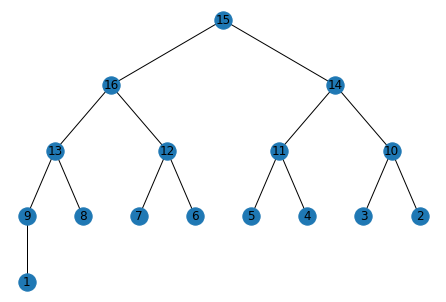

In [ ]:
#@title Resultado visual da AB

G=nx.Graph()
G.add_edges_from([(15,16),(15,14),(16,13),(16,12),(14,11),(14,10),(13,9),(13,8),(12,7),(12,6),(11,5),(11,4),(10,3),(10,2),(9,1)])
pos = hierarchy_pos(G,15)
nx.draw(G, pos=pos, with_labels=True)

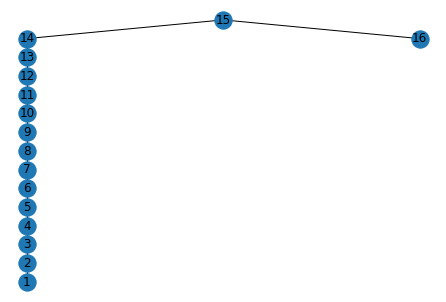

In [ ]:
#@title Resultado visual da ABB
G=nx.Graph()
G.add_edges_from([(15,14),(15,16),(14,13),(13,12),(12,11),(11,10),(10,9),(9,8),(8,7),(7,6),(6,5),(5,4),(4,3),(3,2),(2,"1")])
pos = hierarchy_pos(G,15)
nx.draw(G, pos=pos, with_labels=True)

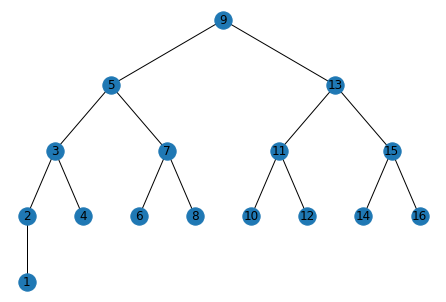

In [ ]:
#@title Resultado visual da AVL
#{oi}
G=nx.Graph()
G.add_edges_from([(9,5),(9,13),(5,3),(5,7),(13,11),(13,15),(3,2),(3,4),(7,6),(7,8),(11,10),(11,12),(15,14),(15,16),(2,1)])
pos = hierarchy_pos(G,9)
nx.draw(G, pos=pos, with_labels=True)


# Situação em que AVL > ABB e AB 

Operação avaliada: busca()

Explicação: A AVL tem um tempo de busca melhor que a ABB degenerada. Para a AB ganhar da AVL, só se fosse um elemento facilmente acessado pela varredura pós-fixada, mas esse nem sempre é o caso. Para simular um caso "normal", onde o usuário quer saber um valor entre 1~16, as chances da ABB ganhar são mais altas que as outras duas árvores. 

In [ ]:
# -------------- CONJUNTO DE DADOS -------------- #
arr = [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

# ---------- VALOR QUE SERÁ PROCURADO ----------- #
import random
valor = random.randint(1,16)
print("O valor procurado é ", valor,"\n")

# --------------- ARVORE BINARIA ---------------- #                    
tree1 = BinaryTree()     
for i in arr:
    tree1.insert(i)
start1 = time.time()
tree1.search_postorder(tree1.root,valor)

# ------------ ARVORE DE BUSCA BINARIA ---------- # 
tree2 = BinarySearchTree()     
for i in arr:
    tree2.insert(i)
start2 = time.time()
tree2.search(valor)

# ------------------ ARVORE AVL ----------------- #
tree3 = AVLTree()
for i in arr:
    tree3.insert(i)
start3 = time.time()
tree3.search(valor)

O valor procurado é  11 

Elemento encontrado na árvore AB!
Tempo para realizar a busca na BT: 0.00010228157043457031
Elemento encontrado na árvore BST!
Tempo para realizar a busca na BST: 0.0001475811004638672
Elemento encontrado na árvore AVL!
Tempo para realizar a busca na AVL: 9.083747863769531e-05


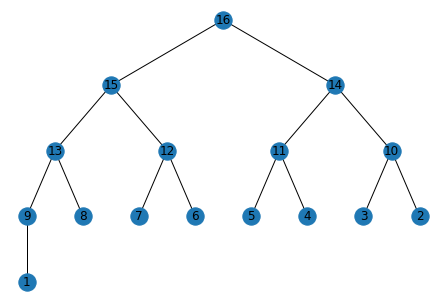

In [ ]:
#@title Resultado visual da AB
G=nx.Graph()
G.add_edges_from([(16,15),(16,14),(15,13),(15,12),(14,11),(14,10),(13,9),(13,8),(12,7),(12,6),(11,5),(11,4),(10,3),(10,2),(9,1)])
pos = hierarchy_pos(G,16)
nx.draw(G, pos=pos, with_labels=True)

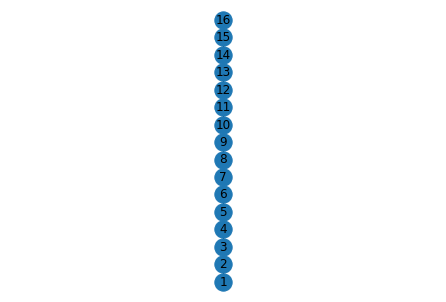

In [ ]:
#@title Resultado visual da ABB
G=nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,13),(13,14),(14,15),(15,16)])
pos = hierarchy_pos(G,16)
nx.draw(G, pos=pos, with_labels=True)

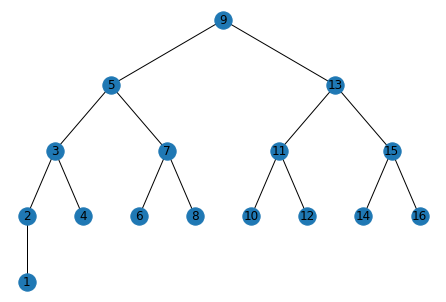

In [ ]:
#@title Resultado visual da AVL
#{oi}
G=nx.Graph()
G.add_edges_from([(9,5),(9,13),(5,3),(5,7),(13,11),(13,15),(3,2),(3,4),(7,6),(7,8),(11,10),(11,12),(15,14),(15,16),(2,1)])
pos = hierarchy_pos(G,9)
nx.draw(G, pos=pos, with_labels=True)


# Referências bibliográficas


* TAMASSIA, Roberto. GOODRICH, Michael T. GOLDWASSER, Michael. **Data Structures and Algorithms in Python.** 1ª Ed. Wiley, 2013. 
* LEE, Kent D. HUBBARD, Steve. **Data Structures and Algorithms with Python** 1ª Ed. Springer International Publishing Switzerland, 2015.
* SINGH, Nikhil. **Level Order Tree Traversal.** Geeks for Geeks. Disponível em: <https://www.geeksforgeeks.org/level-order-tree-traversal/>. Acesso em 17 de out. de 2020. 
* BHARATH, Adikar. **Optimal sequence for AVL tree insertion (without any rotations).** Geeks for Geeks. Disponível em: <https://www.geeksforgeeks.org/optimal-sequence-for-avl-tree-insertion-without-any-rotations/>. Acesso em 18 de out. de 2020. 

